# Pivot Tables

Pandas pivot tables are a powerful tool for summarizing and analyzing data within a DataFrame, inspired by the functionality found in spreadsheet software like Microsoft Excel.

They allow you to reorganize and aggregate data based on specified index (rows), columns, and values, applying an aggregation function to summarize the data.

The following figure illustrates how to organize data in a pivot table:

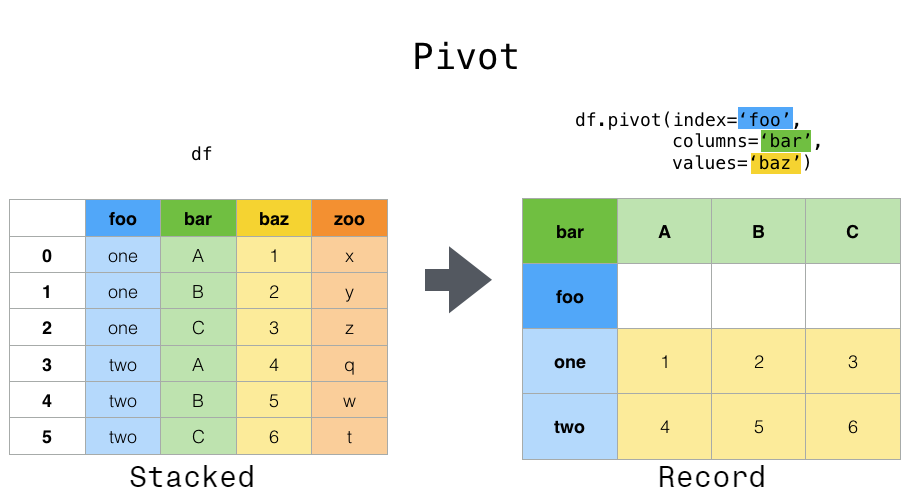

## Key concepts of `pandas.pivot_table`:

* `data`: The DataFrame you want to pivot.
* `values`: The column(s) whose values you want to aggregate.
* `index`: The column(s) whose unique values will form the rows of the pivot table.
* `columns`: The column(s) whose unique values will form the columns of the pivot table.
* `aggfunc`: The aggregation function(s) to apply to the `values`. This can be a single function (e.g., `'mean'`, `'sum'`, `'count'`), a list of functions, or a dictionary mapping columns to functions. By default, it uses the mean.
* `fill_value`: A value to replace missing (NaN) values in the resulting pivot table.
* `margins`: If `True`, adds row/column totals (sub-aggregates) to the pivot table.

## How it works:

`pivot_table` takes your raw, tabular data and transforms it into a more concise, summary table.

It groups the data by the unique combinations of your chosen `index` and `columns`, then applies the `aggfunc` to the values within each group.

This allows you to quickly see trends, relationships, and summaries of your data from different perspectives.

**Example:**


In [ ]:
import pandas as pd

data_dict = {'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
             'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
             'baz': [1, 2, 3, 4, 5, 6],
             'zoo': ['x', 'y', 'z', 'q', 'w', 't']}

# create dataframe
data = pd.DataFrame(data_dict)

# show dataframe
data

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [ ]:
# create pivot table
data_pivot = data.pivot(index='foo', columns='bar', values='baz')

# show pivot table
data_pivot

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


### Create a Pivot Table Using the **`pivot()`** Method

In the following, we will use a dataset containing the evolution of the GDP per capita of countries over the decades.

In [ ]:
# csv file location
url = 'https://raw.githubusercontent.com/tariqzahratahdi/DataScience/refs/heads/main/datasets/gdp.csv'

# making dataframe from csv file
data = pd.read_csv(url)

# show dataframe
data

,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
0,4,AFG,Afghanistan,1970,3.474212,709.00000,NaN,0.003097
1,4,AFG,Afghanistan,1920,26.968016,731.75677,NaN,0.003245
2,4,AFG,Afghanistan,1990,1.269530,604.00000,NaN,0.002347
3,4,AFG,Afghanistan,1960,15.763076,739.00000,NaN,0.003039
4,4,AFG,Afghanistan,2000,2.061114,565.00000,NaN,0.003309
...,...,...,...,...,...,...,...,...
2081,716,ZWE,Zimbabwe,1940,52.746567,813.00000,NaN,0.001113
2082,716,ZWE,Zimbabwe,2010,27.091389,1388.97300,NaN,0.002074
2083,716,ZWE,Zimbabwe,1990,59.110970,2526.07230,NaN,0.002039
2084,716,ZWE,Zimbabwe,1900,54.722645,601.00000,NaN,0.000996


**Example:**

We will use the `pivot()` method and set its parameters as follows:

* `index`: set to `year`.
* `columns`: set to `country`.
* `values`: set to `gdppc`.

In [ ]:
# create a pivot table
data_pivot = data.pivot(index='year', columns='country', values='gdppc')

# show pivot table
data_pivot

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1880,585.46509,522.00000,819.18604,533.66669,1731.500,1041.0000,4285.000,2079.000,811.76746,566.66669,...,1041.0000,811.76746,3477.000,3184.000,2082.0000,653.000,556.62793,811.76746,533.66669,533.66669
1890,635.93024,598.00000,923.37207,567.33331,2152.000,1139.0000,4458.000,2443.000,881.53491,587.33331,...,1139.0000,881.53491,4009.000,3392.000,2147.0000,737.000,608.25580,881.53491,567.33331,567.33331
1900,686.39532,685.00000,1027.55810,601.00000,2756.000,1237.0000,4013.000,2882.000,951.30231,608.00000,...,1237.0000,951.30231,4492.000,4091.000,2219.0000,821.000,659.88373,951.30231,601.00000,601.00000
1910,736.86047,780.00000,1131.74410,628.69232,3822.000,1430.0769,5210.000,3290.000,1021.06980,661.84613,...,1430.0769,1021.06980,4611.000,4964.000,3136.0000,886.000,711.51166,1021.06980,628.69232,628.69232
1920,731.75677,861.31250,1201.21620,682.62964,3473.000,1432.9333,4766.000,2412.000,1242.91890,651.89191,...,1432.9333,3833.67580,4548.000,5552.000,2674.0000,1173.000,713.94592,1017.21620,682.62964,682.62964
1930,702.83783,929.57141,1255.81080,747.81482,4080.000,1448.0000,4708.000,3586.000,1529.94590,614.59460,...,1448.0000,7821.78370,5441.000,6213.000,4301.0000,3444.000,695.29730,981.81079,747.81482,747.81482
1940,673.91895,965.28571,1310.40540,813.00000,4161.000,2144.0000,6166.000,3959.000,1816.97300,577.29730,...,2144.0000,11809.89200,6856.000,7010.000,3661.0000,4045.000,676.64862,946.40540,813.00000,813.00000
1950,645.00000,1001.00000,1365.00000,1052.00000,4987.000,2841.0000,7412.000,3706.000,2104.00000,540.00000,...,2841.0000,15798.00000,6939.000,9561.000,4659.0000,7462.000,658.00000,911.00000,661.00000,701.00000
1960,739.00000,1451.00000,2088.00000,1253.00000,5559.000,3945.0000,8791.000,6519.000,2843.00000,545.00000,...,3945.0000,22433.00000,8645.000,11328.000,4960.0000,9646.000,799.00000,964.00000,960.00000,938.00000


### Create a Pivot Table Using the **`pivot_table()`** Method

In the following, we will use a dataset containing the sales of a supermarket.

In [ ]:
# csv file location
url = 'https://raw.githubusercontent.com/tariqzahratahdi/DataScience/refs/heads/main/datasets/supermarket_sales.csv'

# making dataframe from csv file
data = pd.read_csv(url)

# show dataframe
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,5/1/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,8/3/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27/1/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,8/2/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,29/1/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2/3/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,9/2/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,22/2/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**Example:**

We will use the `pivot_table()` method and set its parameters as follows:

* `index`: set to `Gender`.
* `values`: set to `Total` and `Quantity`.
* `aggfunc`: set to `sum`.

In [ ]:
# create a pivot table and add an aggregate function
data_pivot = data.pivot_table(index='Gender', values=['Total', 'Quantity'], aggfunc='sum')

# show pivot table
data_pivot

,Quantity,Total
Gender,,
Female,2869,167882.925
Male,2641,155083.824


**Example:** create a pivot table that shows total expedetures for femals and males arganized by product line:

In [ ]:
# create a pivot table and add an aggregate function
data_pivot = data.pivot_table(index='Gender', columns='Product line', values='Total', aggfunc='sum')

# show pivot table
data_pivot

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,27102.0225,30437.400,33170.9175,18560.9865,30036.8775,28574.7210
Male,27235.5090,23868.495,22973.9265,30632.7525,23825.0355,26548.1055
